# Context & Objective

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.
Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?


Best Practices for Notebook : 

The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.
The notebook should be submitted as an HTML file (.html) and as a notebook file (.ipynb)
Submission Guidelines :

There are two parts to the submission: 
A well commented Jupyter notebook [format - .ipynb]
File converted to HTML format 
Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks
Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
Submission will not be evaluated if,
it is submitted post-deadline, or,
more than 2 files are submitted

### Import the necessary packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# Libraries to help with model building
from sklearn import tree
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)
%matplotlib inline 

# for statistical analysis 
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve
from sklearn.model_selection import GridSearchCV

# For pandas profiling
from pandas_profiling import ProfileReport


### Read the dataset

In [2]:
Loan = pd.read_csv('Loan_Modelling.csv')

In [3]:
# copying data to another varaible to avoid any changes to original data
data=Loan.copy()

### View the first and last 10 rows of the dataset.

In [4]:
data.head(10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   
5   6   37          13      29    92121       4    0.4          2       155   
6   7   53          27      72    91711       2    1.5          2         0   
7   8   50          24      22    93943       1    0.3          3         0   
8   9   35          10      81    90089       3    0.6          2       104   
9  10   34           9     180    93023       1    8.9          3         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

In [5]:
data.tail(10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4990  4991   55          25      58    95023       4   2.00          3   
4991  4992   51          25      92    91330       1   1.90          2   
4992  4993   30           5      13    90037       4   0.50          3   
4993  4994   45          21     218    91801       2   6.67          1   
4994  4995   64          40      75    94588       3   2.00          3   
4995  4996   29           3      40    92697       1   1.90          3   
4996  4997   30           4      15    92037       4   0.40          1   
4997  4998   63          39      24    93023       2   0.30          3   
4998  4999   65          40      49    90034       3   0.50          2   
4999  5000   28           4      83    92612       3   0.80          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4990       219              0                   0           0       0   
4991       100              0                   0           0       0   
4992         0              0                   0           0       0   
4993         0              0                   0           0       1   
4994         0              0                   0           0       1   
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4990           1  
4991           1  
4992           0  
4993           0  
4994           0  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

### Understand the shape of the dataset.

In [6]:
data.shape

(5000, 14)

* Dataset has 5000 rows and 14 columns

### Let's check the duplicate data. And if any, we should remove it.

In [7]:
data[data.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

### Let's drop the duplicate values. As we can see from above that 125 are duplicates.

In [8]:
data.drop_duplicates(inplace=True)

### Check the data types of the columns for the dataset.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 585.9 KB


### Insights:

- All the data-types are either **int64** or **float64**.
- No type conversion required.


### Check for missing values

In [10]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* There are no missing values in the data.

### Give a statistical summary for the dataset.

In [11]:
data.describe(include='all').T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

* All the numerical variables seem to be right-skewed.
* Min value of Experience is -3 which seems to be incorrect.
* Lof of variables are categorical - value having 0 (FALSE) and 1 (TRUE).

In [12]:
data.drop(data[data['Experience']<0].index, inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4948 non-null   int64  
 1   Age                 4948 non-null   int64  
 2   Experience          4948 non-null   int64  
 3   Income              4948 non-null   int64  
 4   ZIPCode             4948 non-null   int64  
 5   Family              4948 non-null   int64  
 6   CCAvg               4948 non-null   float64
 7   Education           4948 non-null   int64  
 8   Mortgage            4948 non-null   int64  
 9   Personal_Loan       4948 non-null   int64  
 10  Securities_Account  4948 non-null   int64  
 11  CD_Account          4948 non-null   int64  
 12  Online              4948 non-null   int64  
 13  CreditCard          4948 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 579.8 KB


In [14]:
data['Securities_Account'].unique()

array([1, 0])

In [15]:
data['CD_Account'].unique()

array([0, 1])

In [16]:
data['Online'].unique()

array([0, 1])

In [17]:
data['CreditCard'].unique()

array([0, 1])

* Categorical Variables (True/False)
    Personal_Loan	
    Securities_Account	
    CD_Account	
    Online
    CreditCard

* Most of the customers have education level as 1 (Undergrads)
* Most of the customers (3462) dont have an existing Mortgage on the home
* Only 480 Customers have a Personal Loan.

### EDA

### Univariate analysis

In [18]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

### Observations on Age

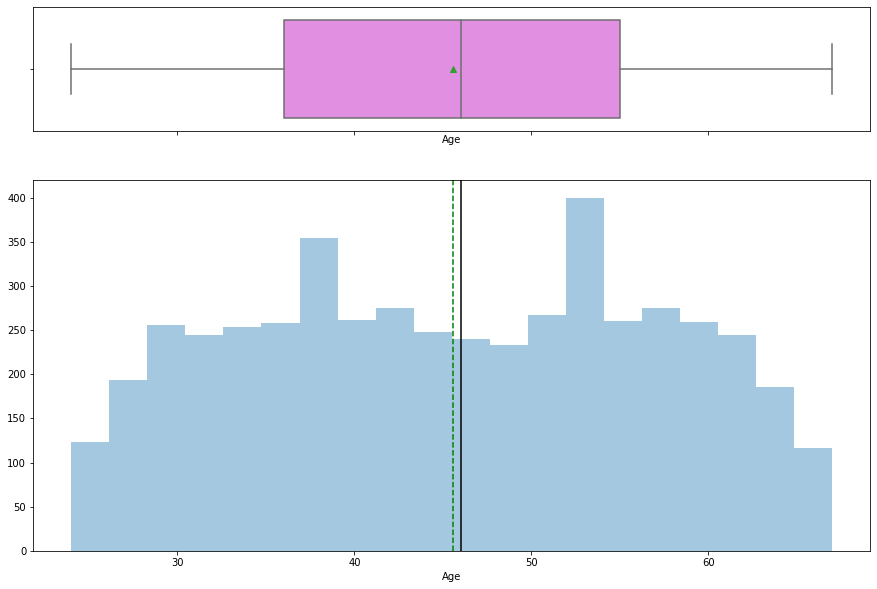

In [19]:
histogram_boxplot(data["Age"])

* The distribution of Age looks like a Normal Distribution.
* There are no outliers in this variable.
* Mean and Median Age is close to 45 years.

### Observations on Experience

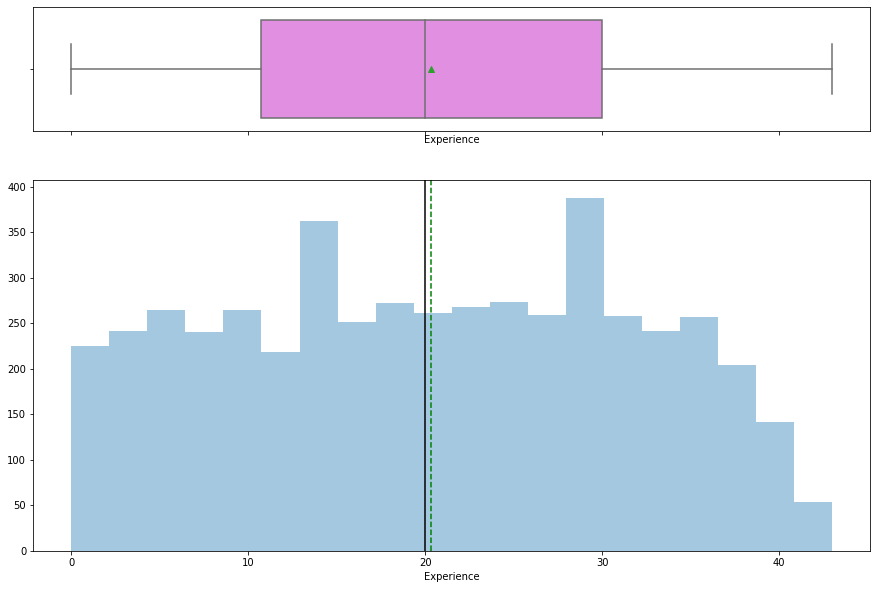

In [20]:
histogram_boxplot(data["Experience"])

* The distribution of Experience looks pretty Normal
* There are no outliers in this variable.
* Mean and Median Age is close to 20 years.
* Few customers have Experience <0 are already removed.


### Observations on Income

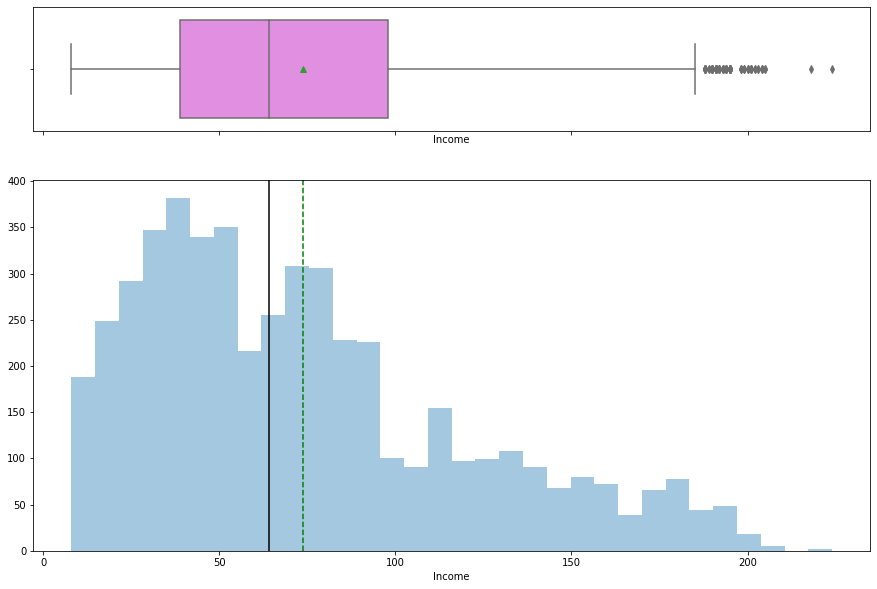

In [21]:
histogram_boxplot(data["Income"])

* The distribution of Income is right-skewed.
* There are outliers in this variable.
* On average customers earn 73K per year.

### Observations on Family

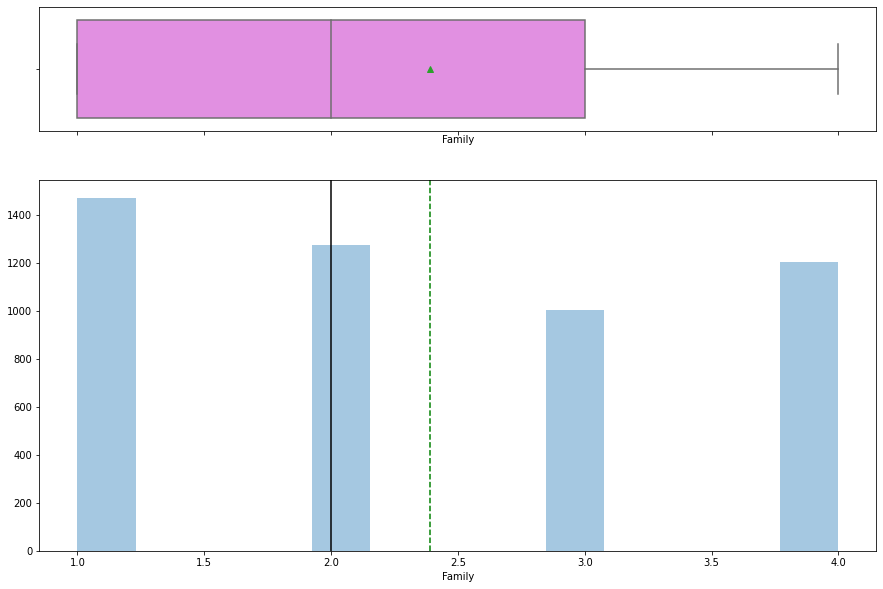

In [22]:
histogram_boxplot(data["Family"])


* The distribution of Family size is categorical.
* Average family size is 2.39

### Observations on Credit Card Average

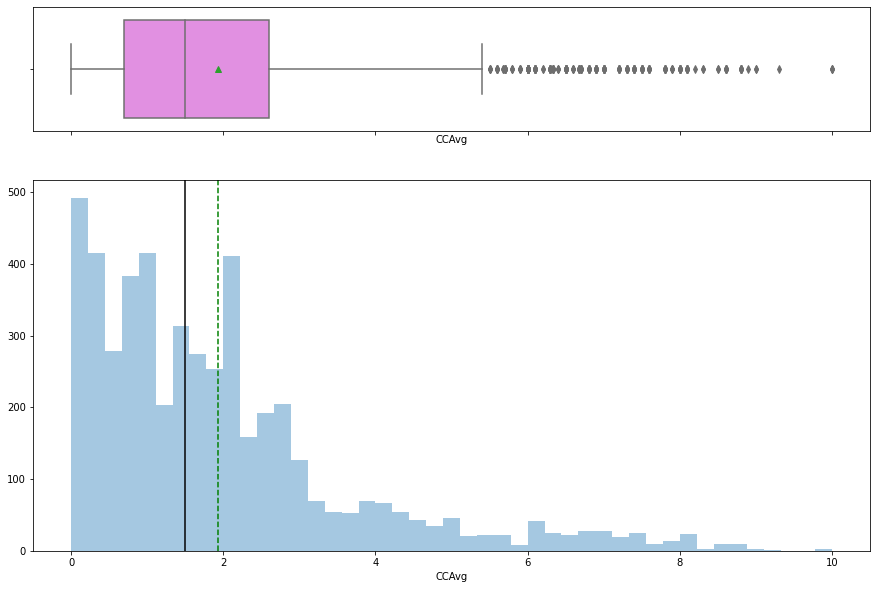

In [23]:
histogram_boxplot(data["CCAvg"])

* The distribution of CCAvg is right-skewed.
* There are outliers in this variable.
* On average customers spend close to $2K monthly.

### Observations on Education

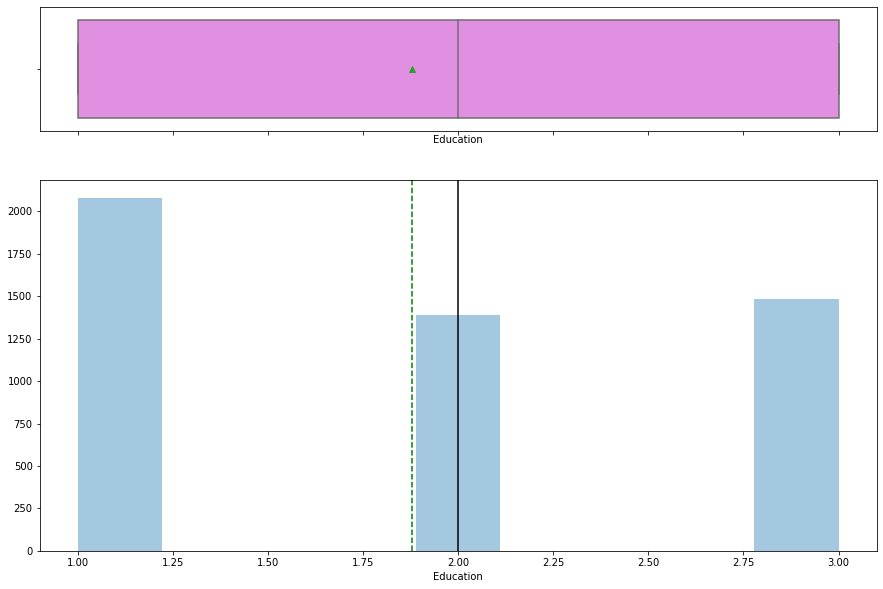

In [24]:
histogram_boxplot(data["Education"])

* The distribution of Education is categorical.
* Over 2000 customers have Education level as 1 (UnderGrad)

### Observations on Mortgage

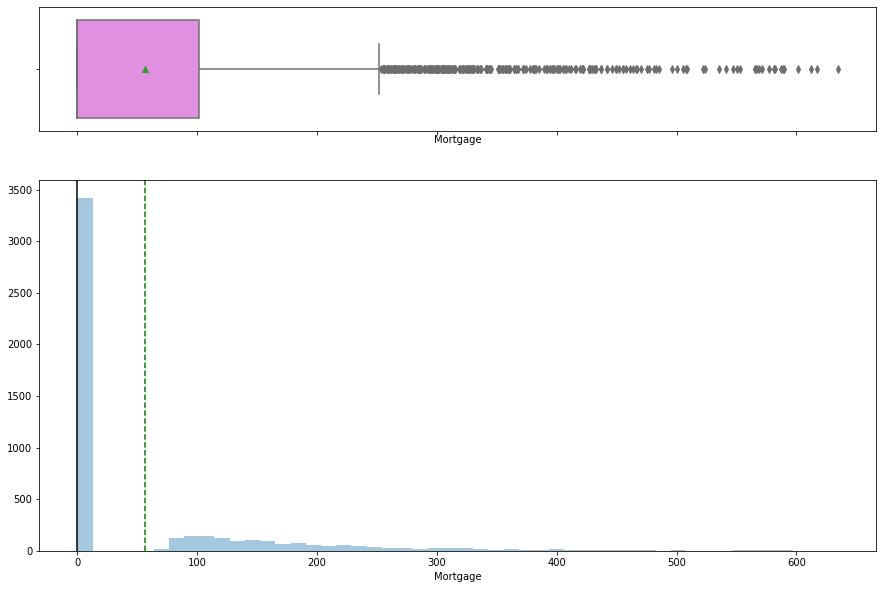

In [25]:
histogram_boxplot(data["Mortgage"])

* The distribution of Mortgage is right-skewed.
* There are outliers in this variable.
* Majority of customers have Mortgage < $100K with a mean of $56K 


### Observations on Securities_Account

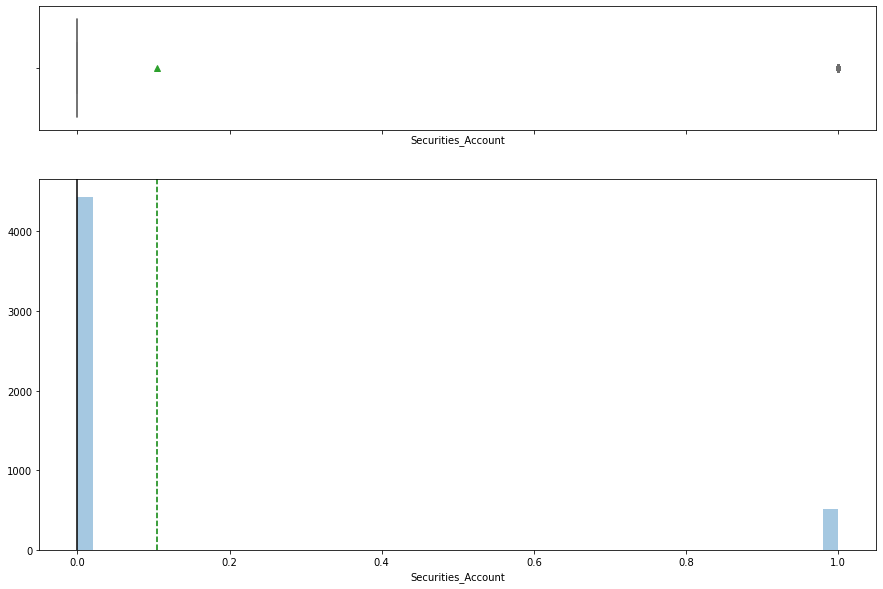

In [26]:
histogram_boxplot(data["Securities_Account"])

* The distribution of Securities_Account is categorical (0 or 1).
* Most of the customers dont have Securities account.

### Observations on CD_Account

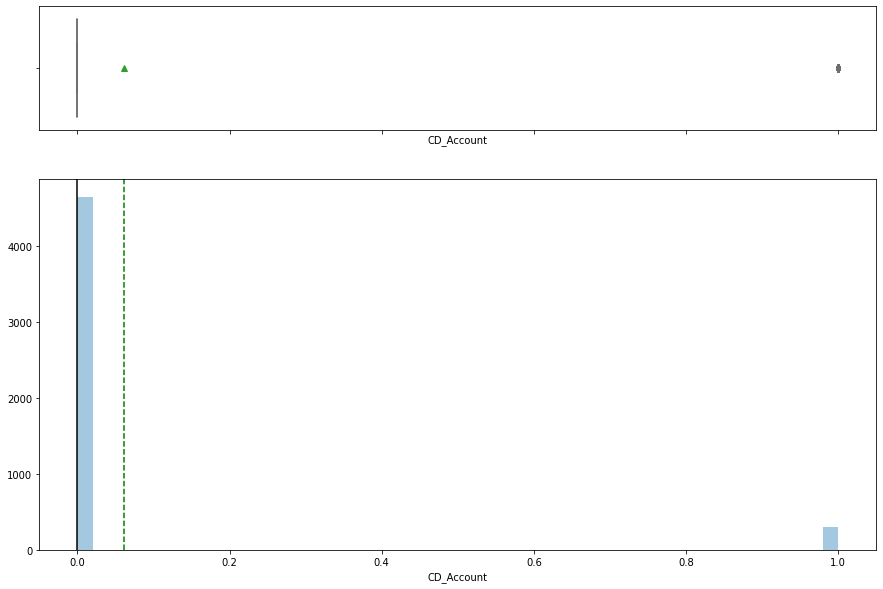

In [27]:
histogram_boxplot(data["CD_Account"])

* The distribution of CD_Account is categorical (0 or 1).
* Most of the customers dont have CD Account.

### Observations on Online

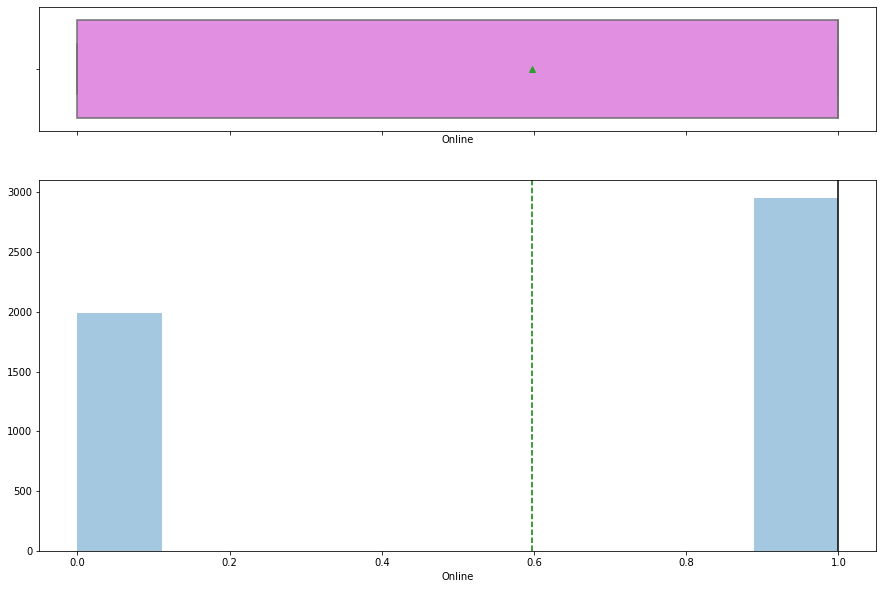

In [28]:
histogram_boxplot(data["Online"])

* The distribution of Online is categorical (0 or 1).
* Most of the customers have an Online Account set up.

### Observations on Credit_Card

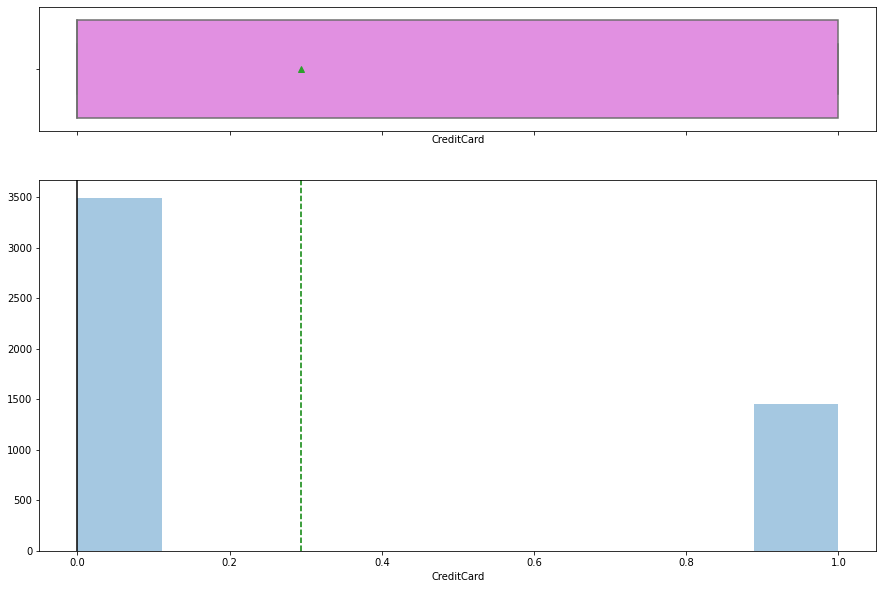

In [29]:
histogram_boxplot(data["CreditCard"])

* The distribution of Credit_Card is categorical (0 or 1).
* Most of the customers dont have Credit Card.

## Bivariate Analysis

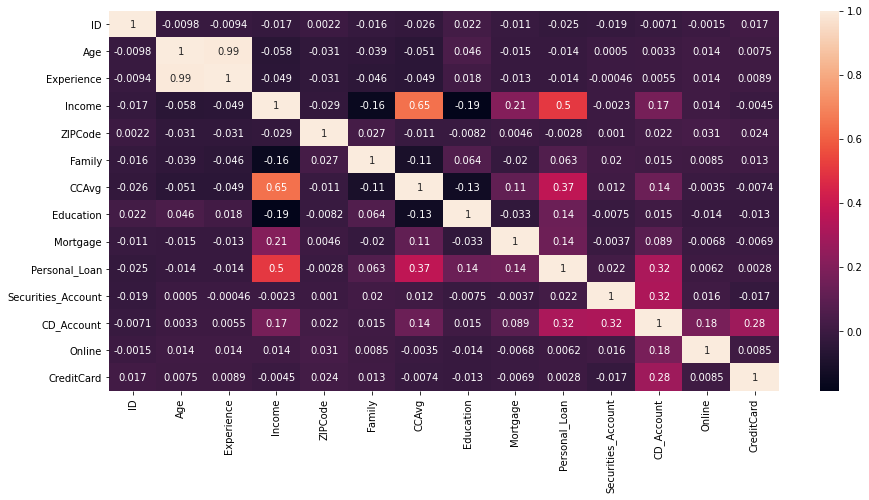

In [30]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

* Revenue shows the highest correlation with Income (0.50) simply because higher income households have more chances of taking personal loans.
* Income and CCAvg (Credit Card Monthly bill) is also correlated  which is understandable.
* Age and Experience are very highly correlated(0.99) with each other.

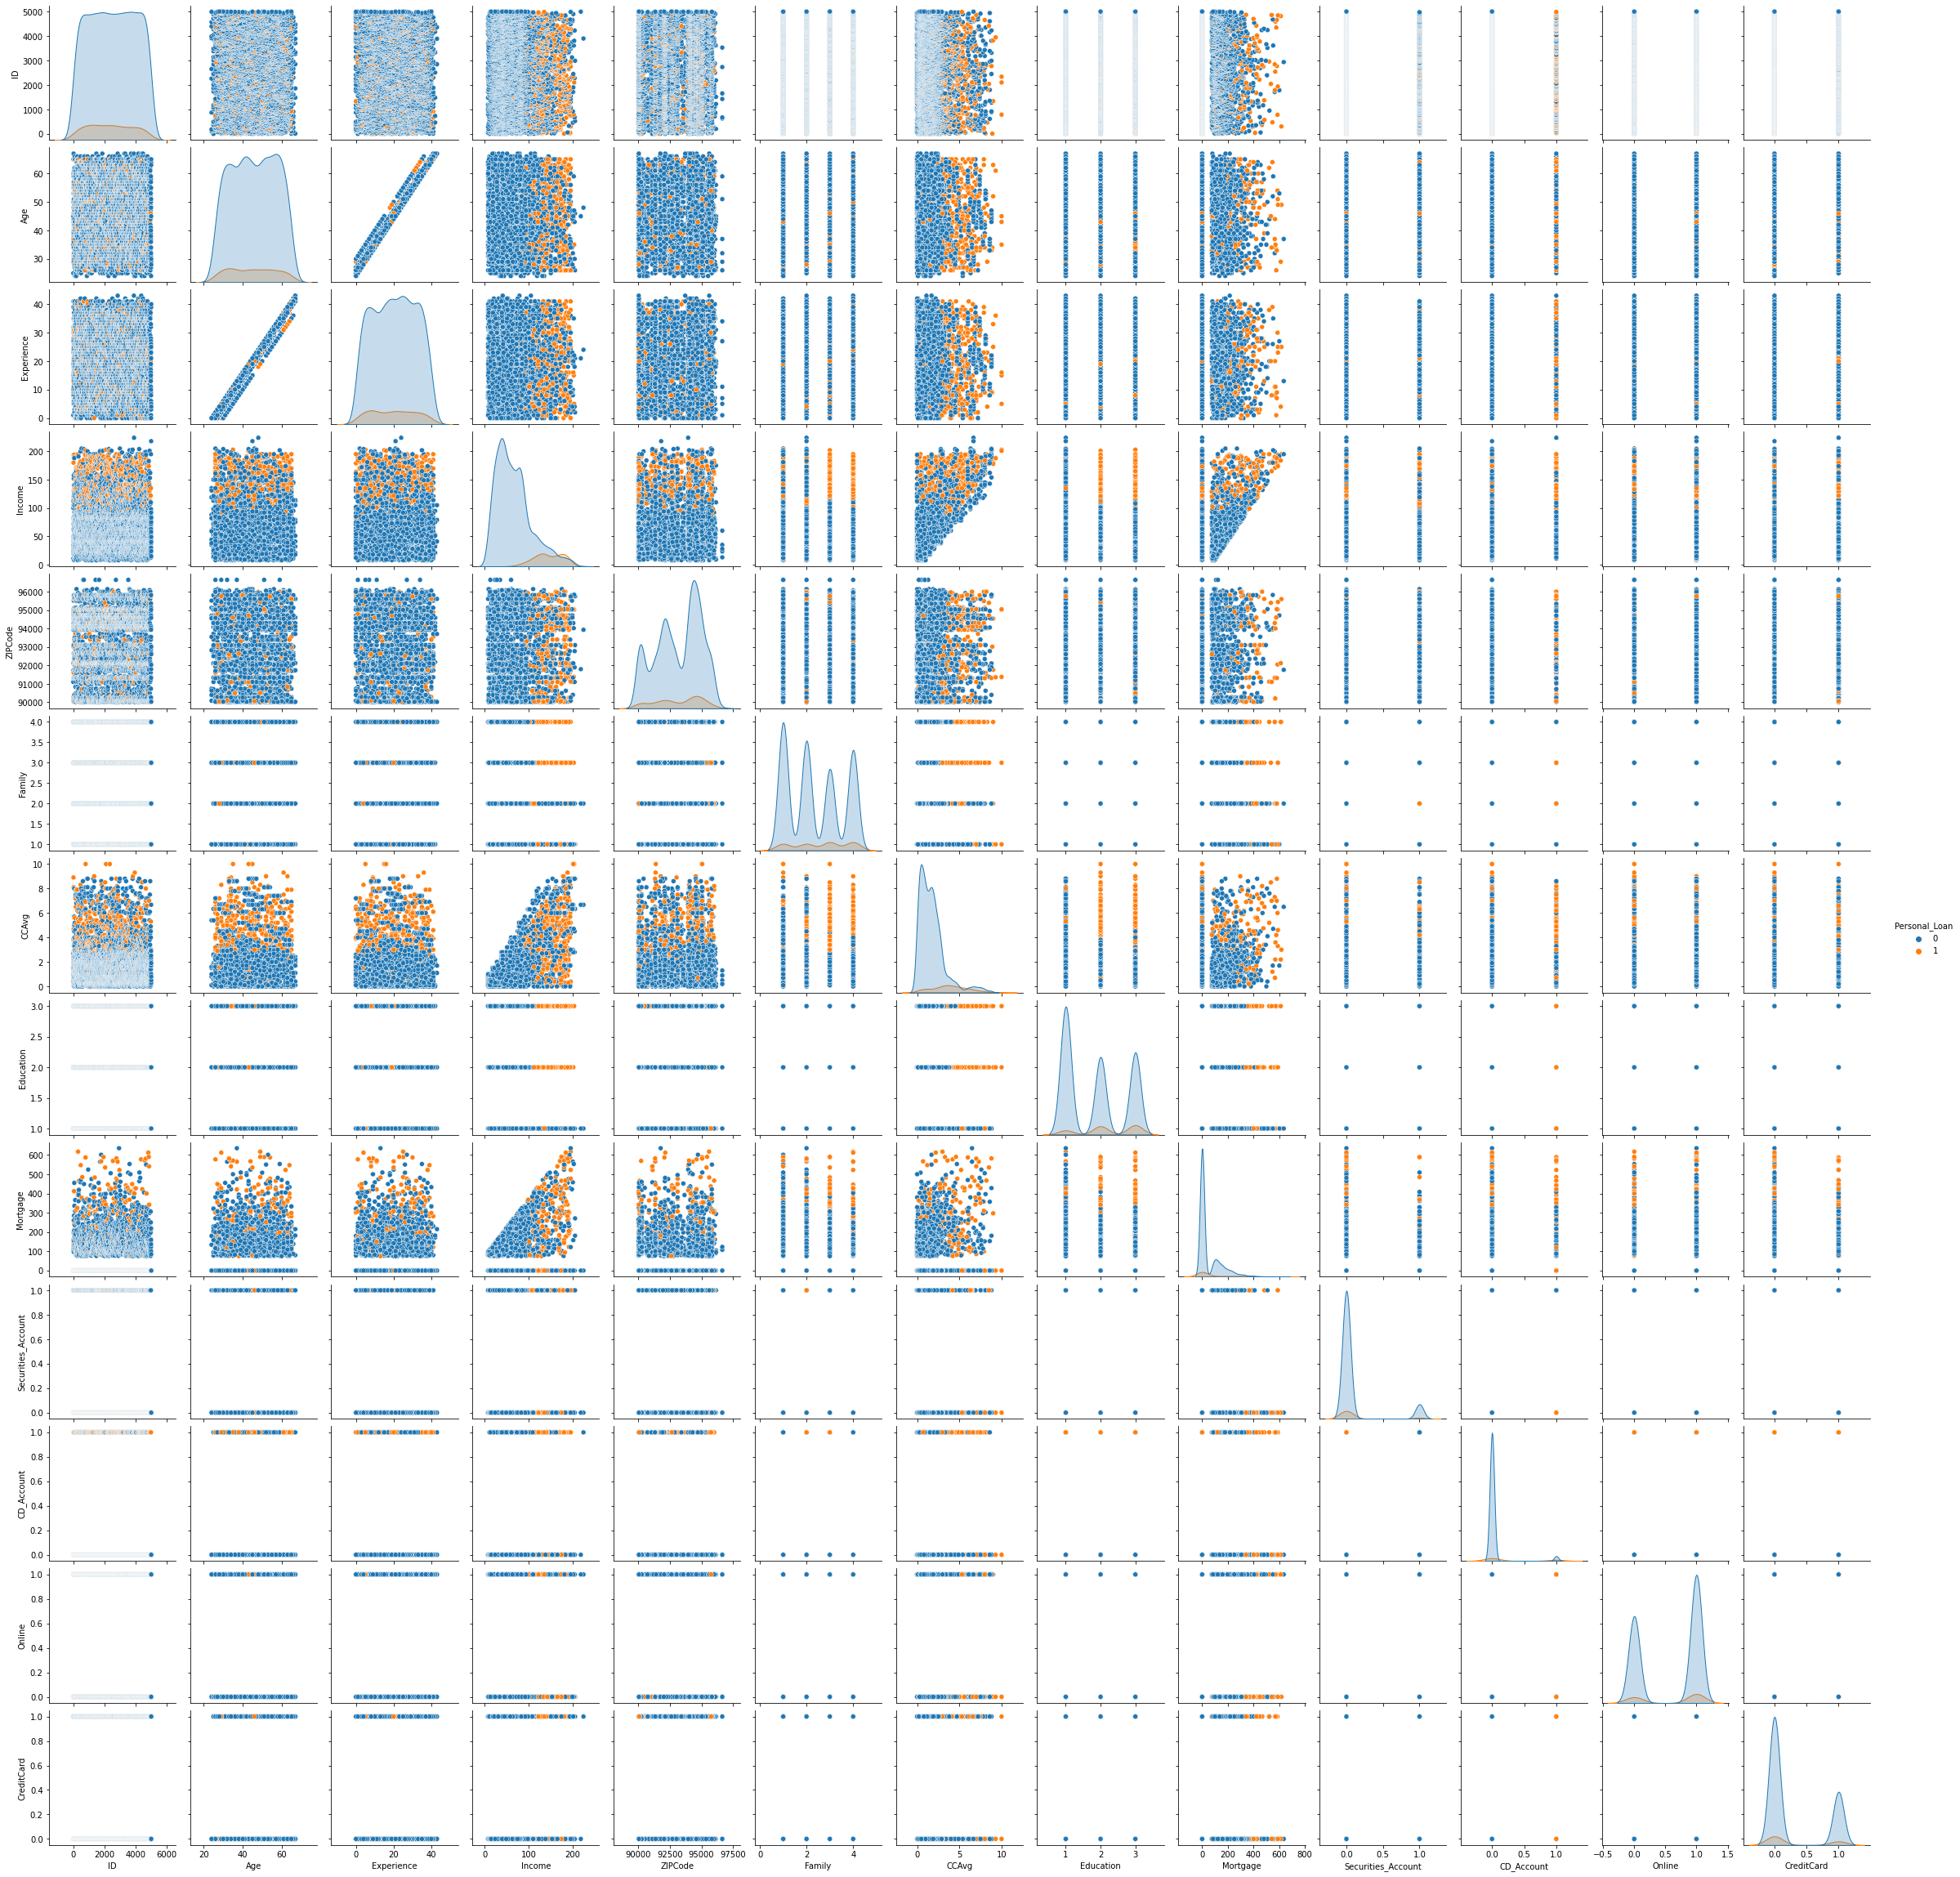

In [31]:
sns.pairplot(data=data,hue="Personal_Loan",)
plt.show()

* We can see varying distributions in variables for personal loan, we should investigate it further.

### Personal_Loan vs Experience, Income, Family, CCAvg, Age and Education

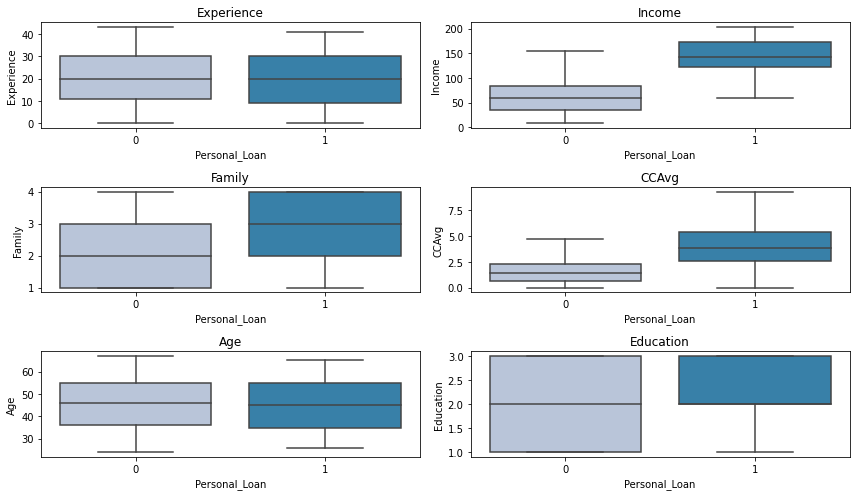

In [31]:
cols = data[['Experience','Income','Family','CCAvg','Age','Education']].columns.tolist()
plt.figure(figsize=(12,7))

for i, variable in enumerate(cols):
                     plt.subplot(3,2,i+1)
                     sns.boxplot(data["Personal_Loan"],data[variable],palette="PuBu",showfliers=False)
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Experience as well as Age are not related to Personal Loan.
* High Income customers have more chances of getting a personal loan
* Family of 3 and 4 members have higher chance of getting a personal loan
* Customers having high CC Avg and higher education have higher chances of getting a personal loan


### Personal_Loan vs CCAvg and Income

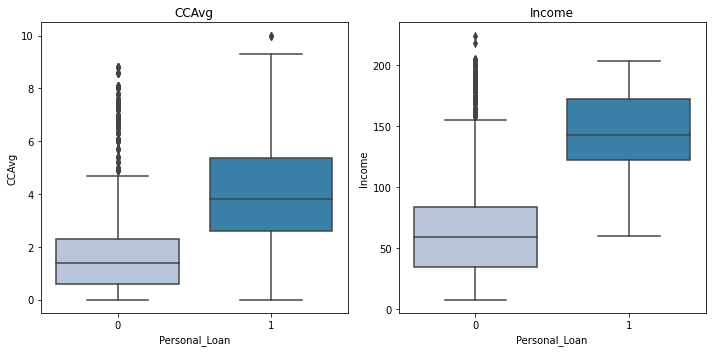

In [32]:
cols = data[['CCAvg','Income']].columns.tolist()
plt.figure(figsize=(10,5))

for i, variable in enumerate(cols):
                     plt.subplot(1,2,i+1)
                     sns.boxplot(data["Personal_Loan"],data[variable],palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

* Customers having high CC Avg and higher Income have higher chances of getting a personal loan

### Personal_Loan vs Mortgage

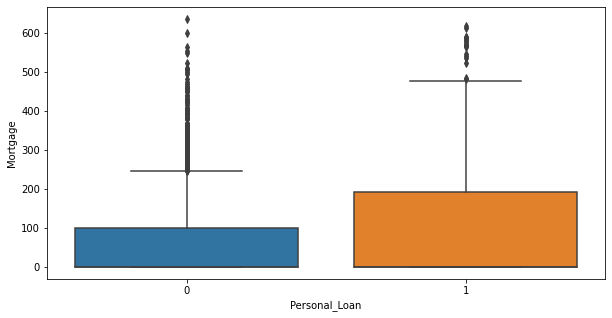

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(data['Personal_Loan'],data['Mortgage'])
plt.show()

* Customers having high Mortgagehave higher chances of getting a personal loan

### Personal_Loan vs Family

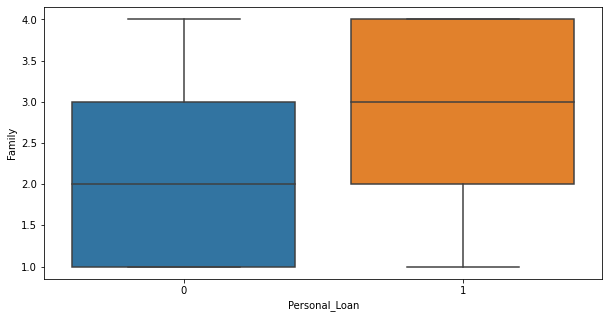

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(data['Personal_Loan'],data['Family'])
plt.show()

* Customers having high Family size have higher chances of getting a personal loan

### Analysis based on different Education Levels

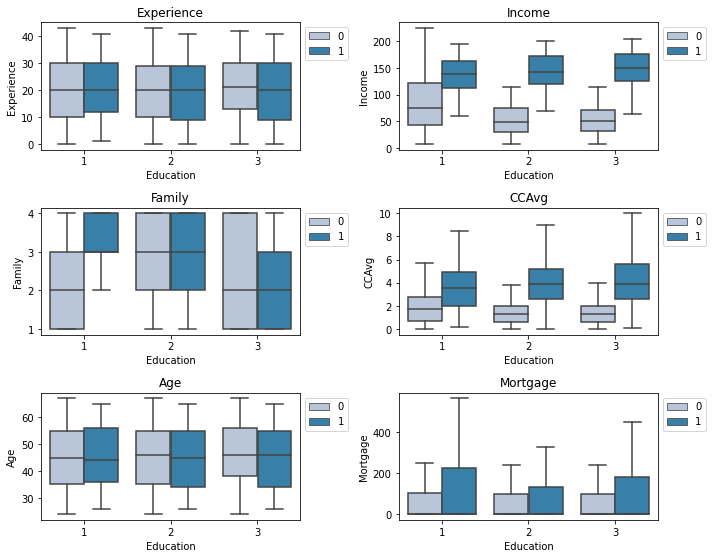

In [35]:
cols = data[['Experience','Income','Family','CCAvg','Age','Mortgage']].columns.tolist()
plt.figure(figsize=(10,10))

for i, variable in enumerate(cols):
                     plt.subplot(4,2,i+1)
                     sns.boxplot(data["Education"],data[variable],hue=data['Personal_Loan'],palette="PuBu", showfliers=False) #turning-off outliers
                     plt.tight_layout()
                     plt.legend(loc="upper left", bbox_to_anchor=(1,1))
                     plt.title(variable)
plt.show()

* Highly educated customers tend to fall into high income categories as well.
* Age and Experience are not corelated with Education.

### Data Preparation

In [36]:
dummy_data = pd.get_dummies(data, columns=['Family','Education','Securities_Account','CD_Account','CreditCard',
                                           'Online'],drop_first=True)
dummy_data.head()

ID  Age  Experience  Income  ZIPCode  CCAvg  Mortgage  Personal_Loan  \
0   1   25           1      49    91107    1.6         0              0   
1   2   45          19      34    90089    1.5         0              0   
2   3   39          15      11    94720    1.0         0              0   
3   4   35           9     100    94112    2.7         0              0   
4   5   35           8      45    91330    1.0         0              0   

   Family_2  Family_3  Family_4  Education_2  Education_3  \
0         0         0         1            0            0   
1         0         1         0            0            0   
2         0         0         0            0            0   
3         0         0         0            1            0   
4         0         0         1            1            0   

   Securities_Account_1  CD_Account_1  CreditCard_1  Online_1  
0                     1             0             0         0  
1                     1             0             0         0  
2                     0             0             0         0  
3                     0             0             0         0  
4                     0             0             1         0

## Model Building - Decision Tree
1. Data preparation
2. Partition the data into train and test set.
3. Built a CART model on the train data.
4. Tune the model and prune the tree, if required.
5. Test the data on test set.

In [37]:
column_names = list(dummy_data.columns)
column_names.remove('Personal_Loan') 
# Keep only names of features by removing the name of target variable
feature_names = column_names
print(feature_names)

['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'Securities_Account_1', 'CD_Account_1', 'CreditCard_1', 'Online_1']


## Split Data

In [38]:
X = dummy_data.drop('Personal_Loan',axis=1)                                                 # Features
y = dummy_data['Personal_Loan'].astype('int64')                                             # Labels (Target Variable)
# converting target to integers - since some functions might not work with bool type

In [39]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3463, 16) (1485, 16)


## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [40]:
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)

In [41]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.15, 1: 0.85},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

In [42]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

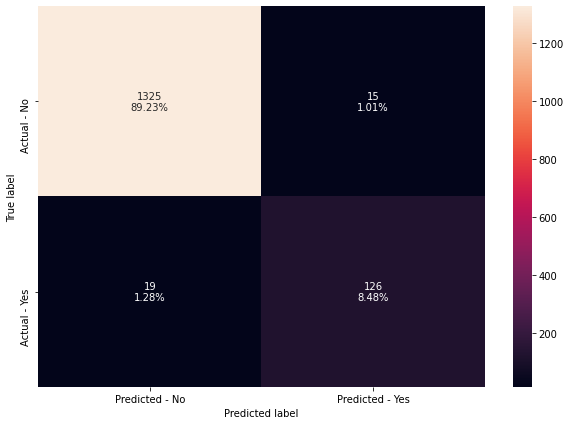

In [43]:
make_confusion_matrix(model,y_test)

In [44]:
y_train.value_counts(1)

0    0.903263
1    0.096737
Name: Personal_Loan, dtype: float64

We only have 10% of positive classes, so if our model marks each sample as negative, then also we'll get 90% accuracy, hence accuracy is not a good metric to evaluate here.

### Insights:

- **True Positives:**
    - Reality: A customer purchased personal loan.
    - Model predicted: The customer will be getting the personal loan.
    - Outcome: The model is good.

- **True Negatives:**
    - Reality: A customer did NOT purchase a personal loan.
    - Model predicted: The customer will NOT be getting a personal loan.
    - Outcome: The business is unaffected.

- **False Positives:**
    - Reality: A customer did NOT purchase a personal loan.
    - Model predicted: The customer will be getting the personal loan.
    - Outcome: The team which is targeting the potential customers will be wasting their resources on the people/customers who will not be contributing to the revenue.

- **False Negatives:**
    - Reality: A customer purchased personal loan.
    - Model predicted: The customer will NOT be getting a personal loan.
    - Outcome: The potential customer is missed by the sales/marketing team, the team could have offered the potential customer some discount or loyalty card to make the customer purchase. (Customer retention will get affected.)

* In this case, not being able to identify a potential customer is the biggest loss we can face. Hence, recall is the right metric to check the performance of the model.

In [45]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

In [46]:
get_recall_score(model)

Recall on training set :  1.0
Recall on test set :  0.8689655172413793


* There is a disparity in performance of model on training set and test set, which suggests that the model is overfiiting.


## Visualizing the Decision Tree

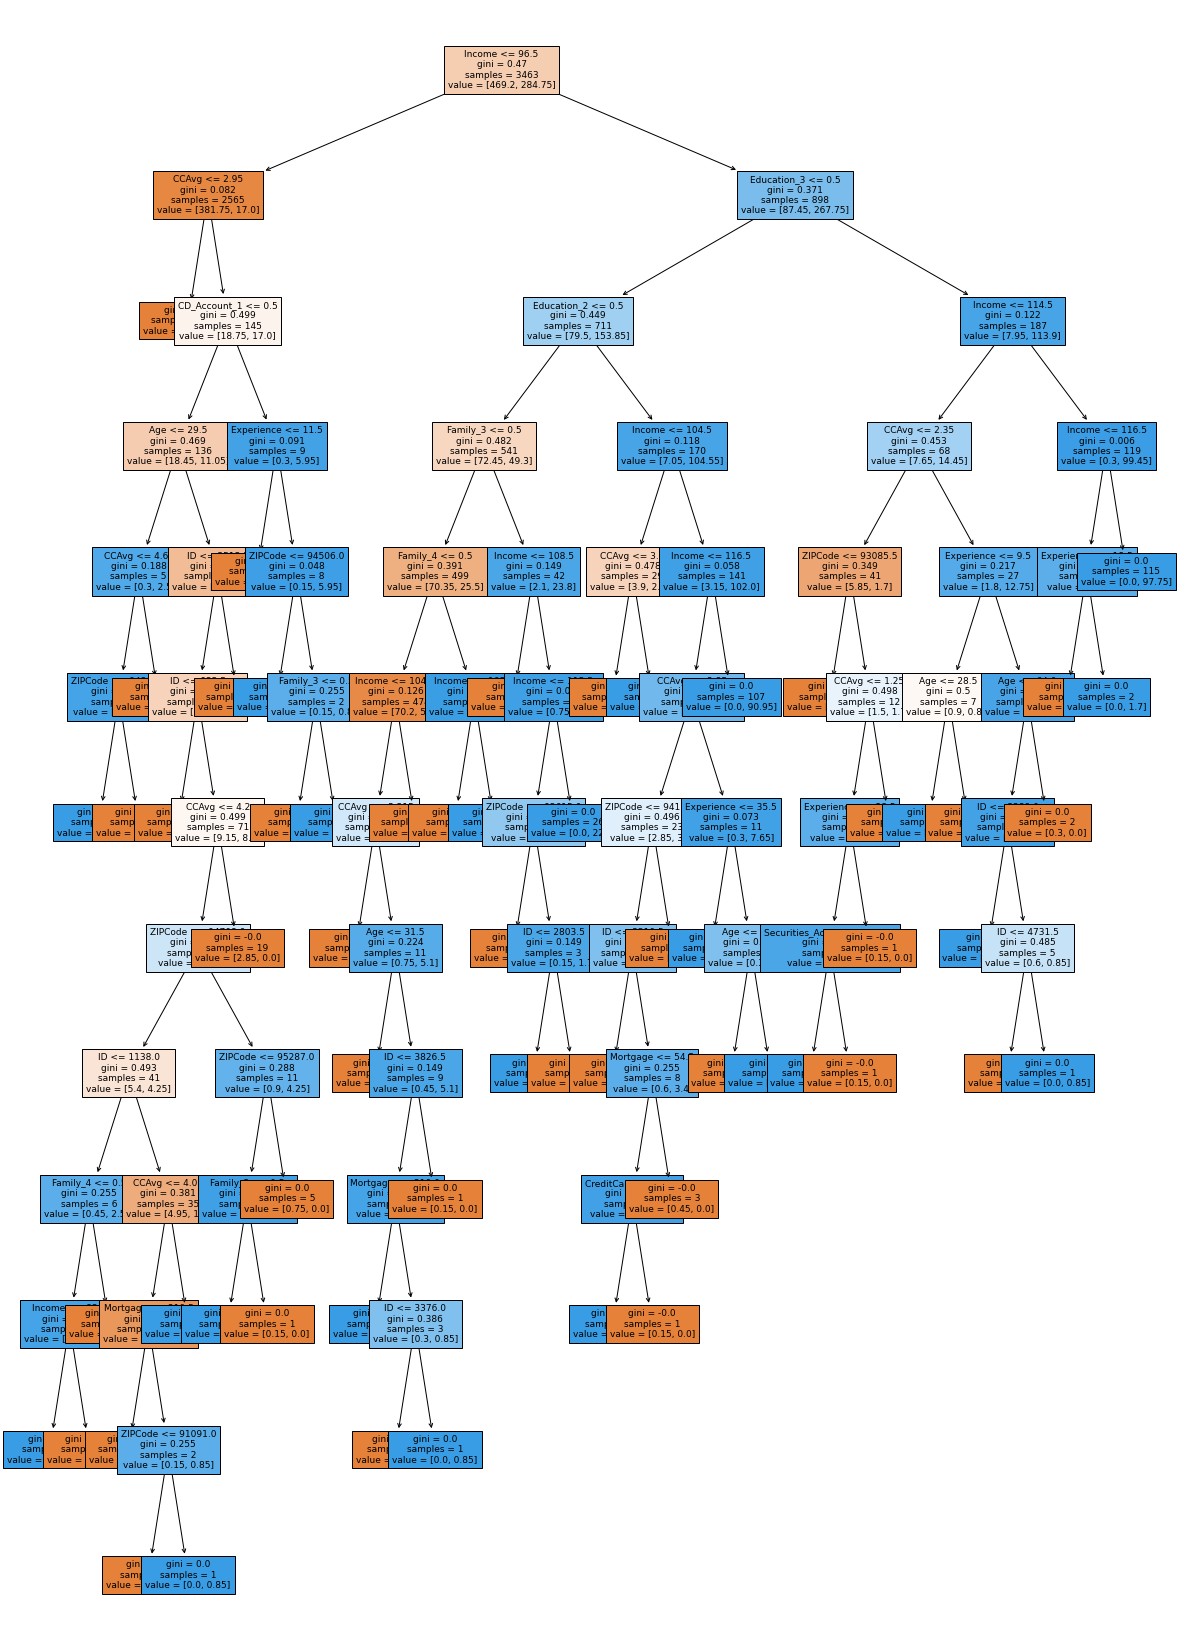

In [47]:
plt.figure(figsize=(20,30))
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None,)
#below code will add arrows to the decision tree split if they are missing
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [48]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 96.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [363.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- Age <= 29.50
|   |   |   |   |--- CCAvg <= 4.65
|   |   |   |   |   |--- ZIPCode <= 94869.00
|   |   |   |   |   |   |--- weights: [0.00, 2.55] class: 1
|   |   |   |   |   |--- ZIPCode >  94869.00
|   |   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |   |--- CCAvg >  4.65
|   |   |   |   |   |--- weights: [0.15, 0.00] class: 0
|   |   |   |--- Age >  29.50
|   |   |   |   |--- ID <= 3513.50
|   |   |   |   |   |--- ID <= 922.50
|   |   |   |   |   |   |--- weights: [3.90, 0.00] class: 0
|   |   |   |   |   |--- ID >  922.50
|   |   |   |   |   |   |--- CCAvg <= 4.20
|   |   |   |   |   |   |   |--- ZIPCode <= 94708.00
|   |   |   |   |   |   |   |   |--- ID <= 1138.00
|   |   |   |   |   |   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Income <= 83.50
|   |   |   |   |   

In [49]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
Income                0.587121
Education_2           0.092962
CCAvg                 0.085627
Family_4              0.079305
Family_3              0.049766
Education_3           0.034273
ID                    0.020037
ZIPCode               0.016644
Age                   0.011390
CD_Account_1          0.009704
Mortgage              0.005789
Experience            0.004976
Family_2              0.000818
CreditCard_1          0.000811
Securities_Account_1  0.000778
Online_1              0.000000


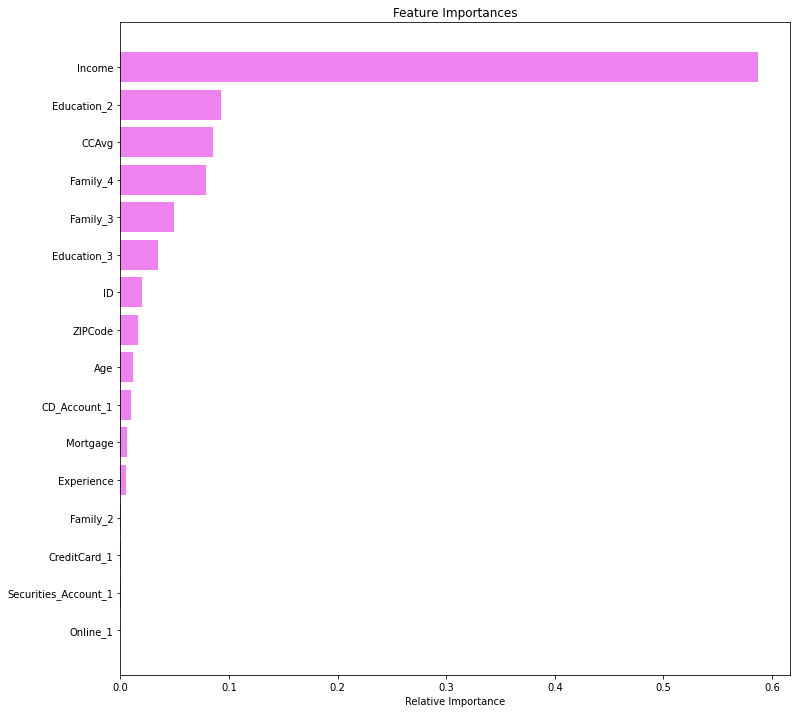

In [50]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* According to the decision tree model, Income is the most important variable for predicting the Revenue.

**The tree above is very complex and difficult to interpret.**

## Reducing over fitting

### Using GridSearch for Hyperparameter tuning of our tree model



* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85})

# Grid of parameters to choose from
parameters = {
            'max_depth': np.arange(1,10),
            'criterion': ['entropy','gini'],
            'splitter': ['best','random'],
            'min_impurity_decrease': [0.000001,0.00001,0.0001],
            'max_features': ['log2','sqrt']
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 0.15, 1: 0.85},
                       criterion='gini', max_depth=5, max_features='log2',
                       max_leaf_nodes=None, min_impurity_decrease=1e-06,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

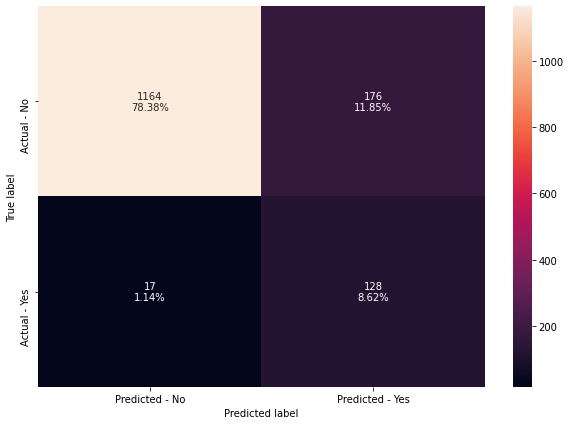

In [53]:
make_confusion_matrix(estimator,y_test)

In [54]:
get_recall_score(estimator)

Recall on training set :  0.9134328358208955
Recall on test set :  0.8827586206896552


**Recall has improved for both train and test set after hyperparameter tuning and we have a generalized model.**

## Visualizing the Decision Tree

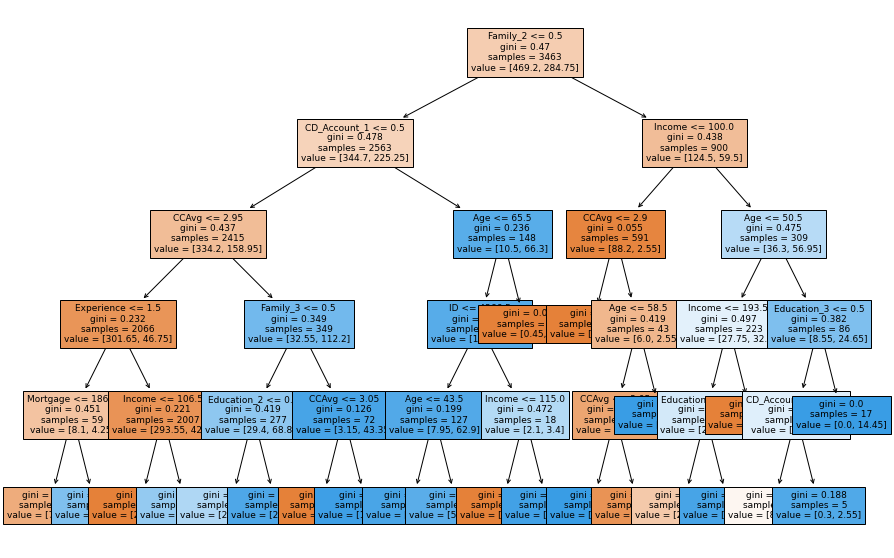

In [55]:
plt.figure(figsize=(15,10))
out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [56]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- Family_2 <= 0.50
|   |--- CD_Account_1 <= 0.50
|   |   |--- CCAvg <= 2.95
|   |   |   |--- Experience <= 1.50
|   |   |   |   |--- Mortgage <= 186.00
|   |   |   |   |   |--- weights: [7.50, 2.55] class: 0
|   |   |   |   |--- Mortgage >  186.00
|   |   |   |   |   |--- weights: [0.60, 1.70] class: 1
|   |   |   |--- Experience >  1.50
|   |   |   |   |--- Income <= 106.50
|   |   |   |   |   |--- weights: [274.05, 0.00] class: 0
|   |   |   |   |--- Income >  106.50
|   |   |   |   |   |--- weights: [19.50, 42.50] class: 1
|   |   |--- CCAvg >  2.95
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |--- weights: [26.85, 45.05] class: 1
|   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |--- weights: [2.55, 23.80] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |--- weights: [2.10, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |--- weights: [1.05, 43.35]

In [57]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                           Imp
CCAvg                 0.378738
Income                0.346086
CD_Account_1          0.166443
Education_2           0.047867
Age                   0.014918
Education_3           0.014222
Family_3              0.014175
Family_2              0.006016
Experience            0.004730
Mortgage              0.003696
ID                    0.003109
ZIPCode               0.000000
Family_4              0.000000
Securities_Account_1  0.000000
CreditCard_1          0.000000
Online_1              0.000000


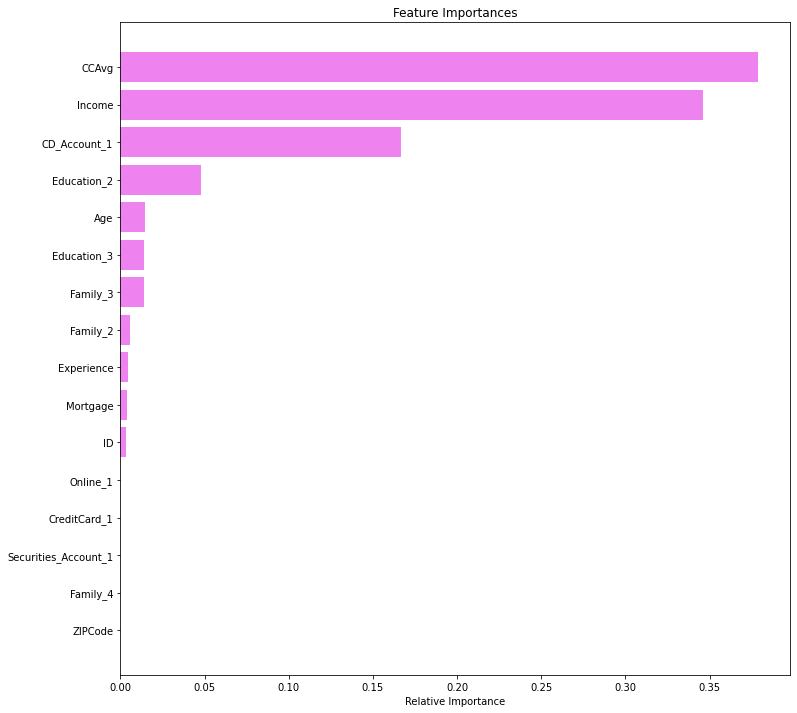

In [58]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Cost Complexity Pruning


The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [59]:
clf = DecisionTreeClassifier(random_state=1,class_weight = {0:0.15,1:0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [60]:
pd.DataFrame(path)

ccp_alphas    impurities
0     0.000000 -4.167132e-15
1     0.000194  3.881198e-04
2     0.000338  7.263386e-04
3     0.000338  1.402776e-03
4     0.000356  2.114815e-03
5     0.000366  2.480457e-03
6     0.000366  3.577383e-03
7     0.000369  3.946873e-03
8     0.000376  4.322671e-03
9     0.000381  4.703763e-03
10    0.000383  5.469541e-03
11    0.000384  5.853881e-03
12    0.000395  6.248881e-03
13    0.000397  7.042296e-03
14    0.000638  7.679825e-03
15    0.000639  8.318683e-03
16    0.000740  1.053824e-02
17    0.000782  1.210134e-02
18    0.000972  1.307313e-02
19    0.000982  1.503772e-02
20    0.001000  1.603767e-02
21    0.001409  1.885541e-02
22    0.001509  2.187395e-02
23    0.001586  2.345981e-02
24    0.001628  2.671629e-02
25    0.001662  3.170336e-02
26    0.001919  3.746153e-02
27    0.002264  3.972582e-02
28    0.003190  4.291607e-02
29    0.004090  4.700615e-02
30    0.004128  5.113416e-02
31    0.004561  5.569560e-02
32    0.005324  6.101994e-02
33    0.005590  6.661019e-02
34    0.005651  7.226120e-02
35    0.006750  7.901120e-02
36    0.019522  9.853279e-02
37    0.029848  1.582286e-01
38    0.029905  2.180386e-01
39    0.252036  4.700744e-01

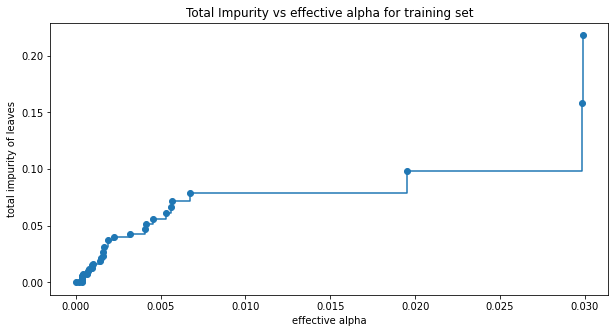

In [61]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [62]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.15,1:0.85})
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.25203583584710565



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

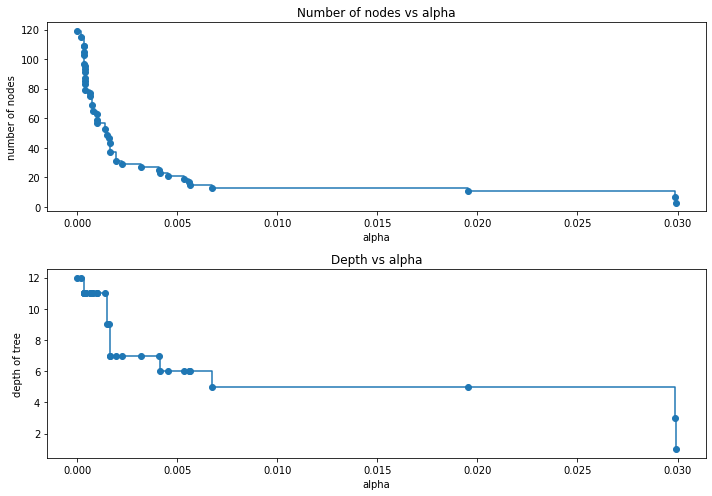

In [63]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [64]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [65]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

In [66]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

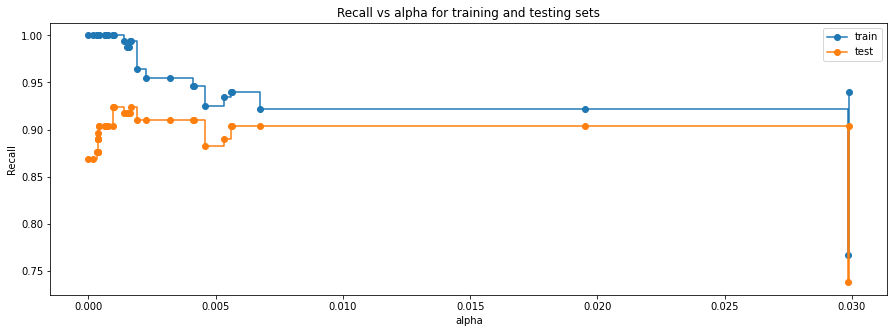

In [67]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post",)
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at 0.03 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.0065 retaining information and getting higher recall.**

In [68]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.000982294366508257,
                       class_weight={0: 0.15, 1: 0.85}, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')


In [69]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.000982294366508257,
                       class_weight={0: 0.15, 1: 0.85}, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

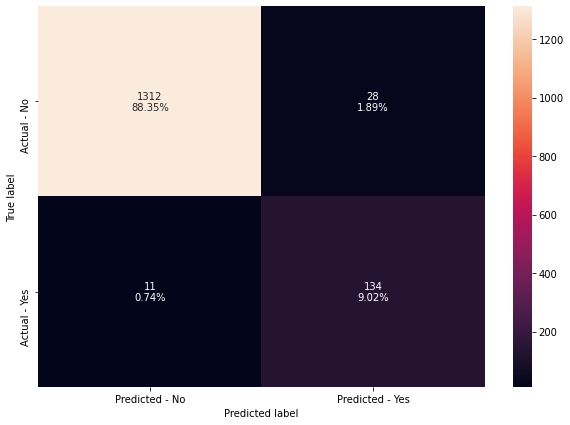

In [70]:
make_confusion_matrix(best_model,y_test)

In [71]:
get_recall_score(best_model)

Recall on training set :  1.0
Recall on test set :  0.9241379310344827


## Visualizing the Decision Tree

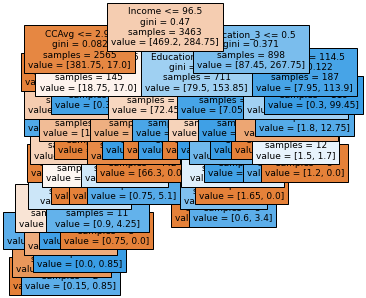

In [72]:
plt.figure(figsize=(5,5))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

* This model might be giving the highest recall but a buisness would not be able to use it to actually target the potential customers.

**Creating model with 0.0065 ccp_alpha**

In [73]:
best_model2 = DecisionTreeClassifier(ccp_alpha=0.0065,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0065, class_weight={0: 0.15, 1: 0.85},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')

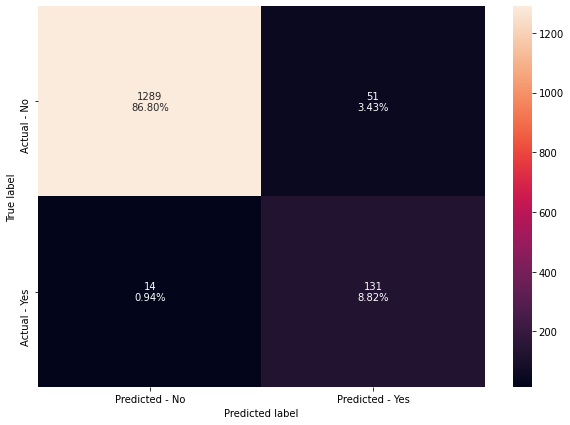

In [74]:
make_confusion_matrix(best_model2,y_test)

* We are able to identify more True positives - customers that are actually going to contribute to revenue than any other model.

In [75]:
get_recall_score(best_model2)

Recall on training set :  0.9402985074626866
Recall on test set :  0.903448275862069


* The results have improved from the initial model and we have higher recall than the hyperparameter tuned model and generalized decision tree - having comparable performance on training and test set.

### Misclassification Analysis: Decision Tree

- **True Positives (TP):131
    - Reality: A customer purchased personal loan. Total 145 actual positive cases.
    - Model predicted: The customer will be getting the personal loan. Total 131 out of 145 actual positives correctly identified. 
    - Outcome: The model is pretty good with a recall rate (131/145*100) of 90.3%
    - Classification was correct on these observations.

- **True Negatives (TN):1289
    - Reality: A customer did NOT purchase a personal loan.
    - Model predicted: The customer will NOT be getting a personal loan.
    - Outcome: The business is unaffected. Total True Negatives correctly identified are 1289/1340*100 = 96.19%
    - Classification was correct on these observations.

- **False Positives (FP):51
    - Reality: A customer did NOT purchase a personal loan.
    - Model predicted: The customer will be getting a personal loan.
    - Outcome: The team which is targeting the potential customers will be wasting their resources on the people/customers who will not be contributing to the revenue.  
    - Classification was incorrect on these observations.

- **False Negatives (FN):14
    - Reality: A customer purchased personal loan.
    - Model predicted: The customer will NOT be getting a personal loan.
    - Outcome: The potential customer is missed by the sales/marketing team, the team could have offered the potential customer some discount or loyalty card to make the customer purchase. (Customer retention will get affected.)
    - Classification was incorrect on these observations.

- Total observations that were misclassified = FP + FN = 65
- Total observations that were correctly classified = TP + TN = 1420
- Misclassification Rate = (FP + FN)/(TP + TN + FP + FN) = 65/1485 = 4.3%


## Visualizing the Decision Tree

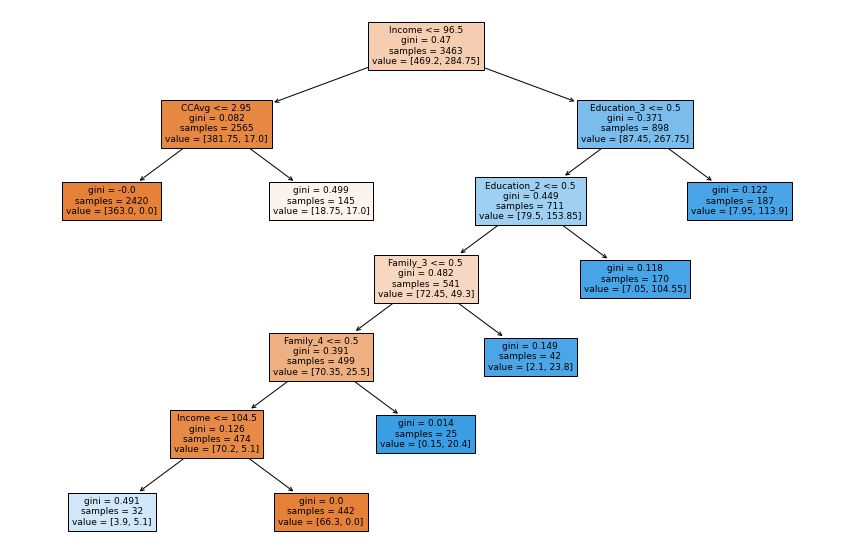

In [76]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(best_model2,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=None)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [77]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2,feature_names=feature_names,show_weights=True))

|--- Income <= 96.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [363.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [18.75, 17.00] class: 0
|--- Income >  96.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_3 <= 0.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- Income <= 104.50
|   |   |   |   |   |   |--- weights: [3.90, 5.10] class: 1
|   |   |   |   |   |--- Income >  104.50
|   |   |   |   |   |   |--- weights: [66.30, 0.00] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [0.15, 20.40] class: 1
|   |   |   |--- Family_3 >  0.50
|   |   |   |   |--- weights: [2.10, 23.80] class: 1
|   |   |--- Education_2 >  0.50
|   |   |   |--- weights: [7.05, 104.55] class: 1
|   |--- Education_3 >  0.50
|   |   |--- weights: [7.95, 113.90] class: 1



In [78]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model2.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
Income                0.650521
Education_2           0.109848
Family_4              0.092104
Family_3              0.057956
CCAvg                 0.049072
Education_3           0.040499
ID                    0.000000
Age                   0.000000
Experience            0.000000
ZIPCode               0.000000
Mortgage              0.000000
Family_2              0.000000
Securities_Account_1  0.000000
CD_Account_1          0.000000
CreditCard_1          0.000000
Online_1              0.000000


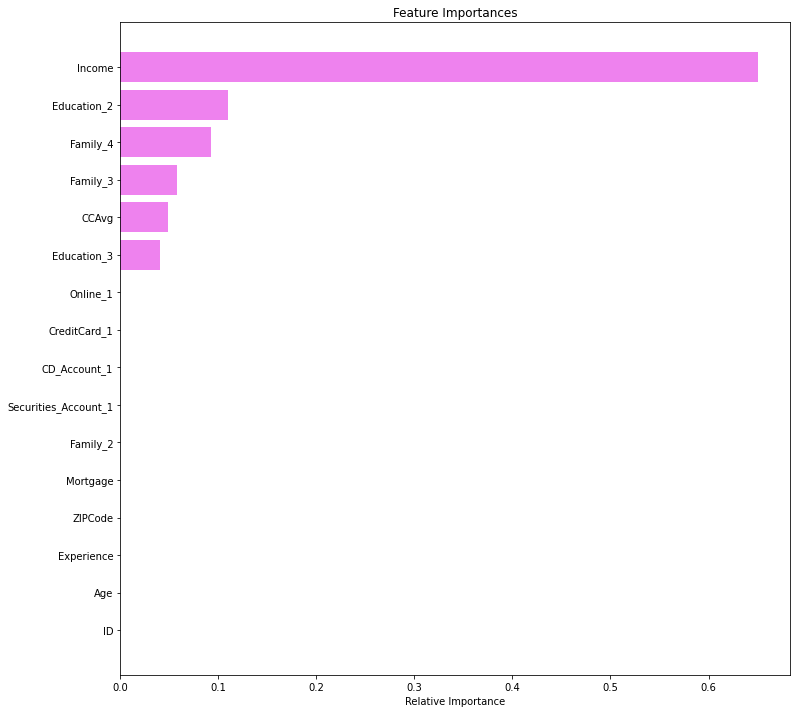

In [79]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Income and Education duration are the top two important features to predict customer purchasing a personal loan.

## Comparing all the decision tree models

In [80]:
comparison_frame = pd.DataFrame({'Model':['Initial decision tree model','Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 'Train_Recall':[1,0.91,0.94], 'Test_Recall':[0.86,0.88,0.90]}) 
comparison_frame

Model  Train_Recall  Test_Recall
0                Initial decision tree model          1.00         0.86
1  Decision treee with hyperparameter tuning          0.91         0.88
2            Decision tree with post-pruning          0.94         0.90

**Decision tree model with post pruning has given the best recall score on data.**

### Logistic Regression

### Data Preparation


In [81]:
X = data.drop('Personal_Loan',axis=1)
Y = data['Personal_Loan']

# creating dummy variables
X = pd.get_dummies(X, columns=['Family','Education','Securities_Account','CD_Account','CreditCard',
                                           'Online'],drop_first=True)
# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42)

In [82]:
X.head()

ID  Age  Experience  Income  ZIPCode  CCAvg  Mortgage  Family_2  Family_3  \
0   1   25           1      49    91107    1.6         0         0         0   
1   2   45          19      34    90089    1.5         0         0         1   
2   3   39          15      11    94720    1.0         0         0         0   
3   4   35           9     100    94112    2.7         0         0         0   
4   5   35           8      45    91330    1.0         0         0         0   

   Family_4  Education_2  Education_3  Securities_Account_1  CD_Account_1  \
0         1            0            0                     1             0   
1         0            0            0                     1             0   
2         0            0            0                     0             0   
3         0            1            0                     0             0   
4         1            1            0                     0             0   

   CreditCard_1  Online_1  
0             0         0  
1             0         0  
2             0         0  
3             0         0  
4             1         0

**Fist, let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [83]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [84]:
def make_confusion_matrix(model,test_X,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Before making the model, first let's check if our variables has multicollinearity

* There are different ways of detecting (or testing) multi-collinearity, one such way is Variation Inflation Factor.
* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use. 

In [85]:
# dataframe with numerical column only
num_feature_set = X.copy()
num_feature_set = add_constant(num_feature_set)
num_feature_set = num_feature_set.astype(float)

In [86]:
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                   3293.249249
ID                         1.003301
Age                       92.140338
Experience                91.947853
Income                     1.878846
ZIPCode                    1.005652
CCAvg                      1.731656
Mortgage                   1.052071
Family_2                   1.393969
Family_3                   1.380871
Family_4                   1.420837
Education_2                1.293461
Education_3                1.332063
Securities_Account_1       1.140360
CD_Account_1               1.340911
CreditCard_1               1.112656
Online_1                   1.040674
dtype: float64



* There's no multicollinearity present, we can rely on the model use it to make 


In [87]:
model = LogisticRegression(random_state=1)
lg = model.fit(X_train,y_train)

### Checking model performance

Accuracy on training set :  0.9018192318798729
Accuracy on test set :  0.9218855218855219
Recall on training set :  0.32763532763532766
Recall on test set :  0.3023255813953488
Precision on training set :  0.5251141552511416
Precision on test set :  0.6


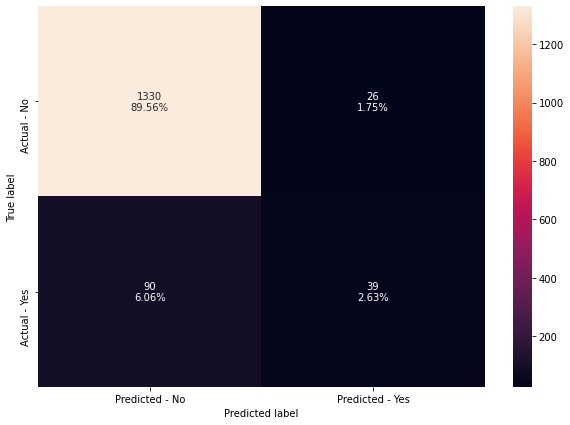

In [88]:
scores_LR = get_metrics_score(lg,X_train,X_test,y_train,y_test,flag=True)
# creating confusion matrix
make_confusion_matrix(lg,X_test,y_test)

### Misclassification Analysis:

- **True Positives (TP):39
    - Reality: A customer purchased personal loan. Total 145 actual positive cases.
    - Model predicted: The customer will be getting the personal loan. Total 39 out of 129 actual positives correctly identified. 
    - Outcome: The model is predicts with a recall rate (39/129*100) of 30.2% which is not very good.
    - Classification was correct on these observations.

- **True Negatives (TN):1330
    - Reality: A customer did NOT purchase a personal loan.
    - Model predicted: The customer will NOT be getting a personal loan.
    - Outcome: The business is unaffected. Total True Negatives correctly identified are 1330/1369*100 = 97.1%
    - Classification was correct on these observations.

- **False Positives (FP):26
    - Reality: A customer did NOT purchase a personal loan.
    - Model predicted: The customer will be getting a personal loan.
    - Outcome: The team which is targeting the potential customers will be wasting their resources on the people/customers who will not be contributing to the revenue.  
    - Classification was incorrect on these observations.

- **False Negatives (FN):90
    - Reality: A customer purchased personal loan.
    - Model predicted: The customer will NOT be getting a personal loan.
    - Outcome: The potential customer is missed by the sales/marketing team, the team could have offered the potential customer some discount or loyalty card to make the customer purchase. (Customer retention will get affected.)
    - Classification was incorrect on these observations.

- Total observations that were misclassified = FP + FN = 116
- Total observations that were correctly classified = TP + TN = 1369
- Misclassification Rate = (FP + FN)/(TP + TN + FP + FN) = 116/1369 = 8.4%


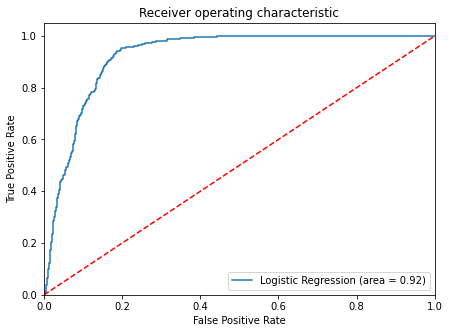

In [158]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:,1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:,1])
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

* Model has given a generalized performance on training and test set.
* Accuracy is pretty high but Recall gives the true measure of model performance.
* Let's change the threshold to see if the model performance can be improved.

### Finding the coefficients

In [159]:
log_odds = lg.coef_[0]
pd.DataFrame(log_odds, X_train.columns, columns=['coef']).T

ID      Age  Experience    Income   ZIPCode     CCAvg  Mortgage  \
coef -0.000056 -0.00039   -0.000405  0.037143 -0.000065  0.001134  0.000803   

      Family_2  Family_3  Family_4  Education_2  Education_3  \
coef -0.000043  0.000056  0.000035     0.000079     0.000082   

      Securities_Account_1  CD_Account_1  CreditCard_1  Online_1  
coef              0.000011      0.000125     -0.000011  0.000002

### Coefficient interpretations

* Coefficient of Income, and CCAvg are positive, increase in these will lead to increase in chances of a customer getting a personal loan.
* Coefficient of Family_2 and Online_1 are negative, increase in these will lead to decrease in chances of a customer getting a personal loan.

###  Converting coefficients to odds

**Odds:**
* When coefficient is b , then change in odds is (exp(b)-1)*100 %
* Probability = odd/(1+odd)

In [160]:
odds = (np.exp(np.abs(lg.coef_[0]))-1)*100
pd.set_option('display.max_rows',None)
pd.DataFrame(odds, X_train.columns, columns=['odds']).T

ID       Age  Experience    Income   ZIPCode     CCAvg  Mortgage  \
odds  0.005572  0.039051    0.040536  3.784163  0.006487  0.113499  0.080295   

      Family_2  Family_3  Family_4  Education_2  Education_3  \
odds  0.004317  0.005649  0.003526     0.007938     0.008156   

      Securities_Account_1  CD_Account_1  CreditCard_1  Online_1  
odds              0.001116      0.012536      0.001064   0.00022

### Coefficient interpretations

* CCAvg: 1 unit change in CCAvg will increase the odds of a customer purchasing personal loan by .10%
* Income: 1 unit change in Income  will increase the odds of of a customer defaulting by 3.61%

### Finding optimal threshold

In [161]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg.predict_proba(X_test)[:,1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.09461076777580471


In [162]:
# Model prediction with optimal threshold
pred_train_opt = (lg.predict(X_train)>optimal_threshold).astype(int)
pred_test_opt = (lg.predict(X_test)>optimal_threshold).astype(int)

In [163]:
#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

Accuracy on train data: 0.9084608720762345
Accuracy on test data: 0.9050505050505051
Recall on train data: 0.33134328358208953
Recall on test data: 0.31724137931034485
Precision on train data: 0.5441176470588235
Precision on test data: 0.5227272727272727


* No significant change in the model performance.

### Now Let's use Precision-Recall curve and see if we can find a better threshold

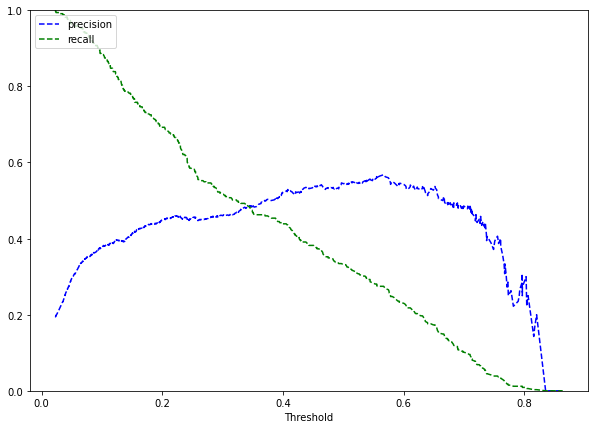

In [164]:
y_scores=lg.predict_proba(X_train)[:,1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At threshold around 0.37 we will get equal precision and recall but taking a step back and selecting value around 0.35 will provide a higher recall and a good precision.

In [91]:
optimal_threshold = 0.35

# Model prediction with optimal threshold
pred_train_opt = (lg.predict_proba(X_train)[:,1]>optimal_threshold)
pred_test_opt = (lg.predict_proba(X_test)[:,1]>optimal_threshold)

#Model performance with optimal threhold

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt))
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('ROC-AUC Score on train data:',roc_auc_score(y_train, pred_train_opt) )
print('ROC-AUC Score on test data:',roc_auc_score(y_test, pred_test_opt))

Accuracy on train data: 0.8934449898931562
Accuracy on test data: 0.9151515151515152
Recall on train data: 0.45584045584045585
Recall on test data: 0.46511627906976744
Precision on train data: 0.47337278106508873
Precision on test data: 0.5128205128205128
ROC-AUC Score on train data: 0.6993212561978629
ROC-AUC Score on test data: 0.7115404404198394


* Model is giving a generalized performance on training and test set.
* Recall and Precision are acceptable.
* Area under the curve has decreased as compared to the initial model but the performance is generalized on training and test set. 

### Comparison between Decision Tree and Logistic Regression

### Decision Tree
- We analyzed the "Personal Loan Campaign" using Decision Tree Classifier and Logistic Regression to build a predictive model for the same.
- The model built can be used to predict if a customer is going to purchase a personal loan or not.
- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
- Income, CCAvg, and Education are the most important variable in predicting the customers that will contribute to the revenue. 
- We established the importance of hyper-parameters/ pruning to reduce overfitting.
- The best recall was 94% on training dataset and 90% on testing data which is extremely high.

### Logistic Regression
- The best test recall is 46.5% and the test precision is 51.2%. The model performance can be improved, in terms of precision and recall and the bank can use use the model for new customers once desired level of model performance is achieved.
- We saw our analysis that customers with higher income or CCAvg are more likely to get a personal loan. The bank can be more strict with their rules to compensate for the risk.
- Misclassification rate is significantly higher in Logistic Regression than Decision Tree.

### Recommendations

### Overall recommendation is that Decision Tree Model is much better than Logistic Regression for this dataset due to the higher Recall Score

* According to the decision tree model - 

  - Most of the customers have education level as 1 (Undergrads)
  - Most of the customers (3462) dont have an existing Mortgage on the home
  - Only 480 Customers have a Personal Loan.

* Our analysis showed that, families having 3 or more members are slightly more likely to get a personal loan. The bank can alter their policies to promote this.

* Our analysis showed that, customers having higher education are slightly more likely to get a personal loan. The bank can alter their policies to promote this.

* Customers can be provided some incentive - Member Loyalty programs initiatives like special discounts, coupons, etc to promote personal loan program.

* Online resources can be improved since customers who are more active online tend to purchase personal loan. Website should be made more friendly, easily accessible, and feasible for other operating systems and browsers so that new visitors can get comfortable easily.

* Site Engagement - Version of the site for slower-internet users, Consistent and user-friendly mobile website design for more browsers and operating systems.